# import libraries

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# gamma_pop

## sulfate - dust

In [2]:
# no seasalt & dust
gamma_pop_nsd = np.zeros((2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776829'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sce = int(filename[-29:-27])
            if (ncf.variables["gamma_pop_pr"].shape[0] != 49):
                print(sce)
                pass
            else:
                gamma_pop_nsd[0, sce, :] = ncf.variables["gamma_pop_pr"].data
                gamma_pop_nsd[1, sce, :] = ncf.variables["gamma_pop_comp"].data
                time = ncf.variables["time"].data/3600

gamma_pop_nsd_error = (gamma_pop_nsd[1,:].ravel() - 
               gamma_pop_nsd[0,:].ravel())/gamma_pop_nsd[0,:].ravel()    

d_wds = {"gamma_pop_ref": gamma_pop_nsd[0, :].ravel(),  # nsd: no seasalt and dust
         "gamma_pop_comp": gamma_pop_nsd[1, :].ravel(),
         "gamma_pop_error": gamma_pop_nsd_error * 100}
# pd.set_option('display.max_rows', df_nsd.shape[0]+1)
df_wds= pd.DataFrame(data=d_wds)
print(df_wds.shape)

df_wds_2ndngt = df_wds[((df_wds.index.values % 49) >=37) & ((df_wds.index.values % 49) <= 48)]
print(df_wds_2ndngt.shape)

df2 = df_wds_2ndngt.dropna()
print(df2.shape)
null_data = df_wds_2ndngt[df_wds_2ndngt.isnull().any(axis=1)]
null_case_index = null_data.index.values
null_sce_index  = (null_case_index/49).astype(int)
null_hour_index = null_case_index % 49
print(null_sce_index)
print(null_hour_index)
print(null_data.shape)

df3 = df_wds.dropna()
print(df3.shape)

75
91
(4900, 3)
(1200, 3)
(642, 3)
[ 0  0  0  0  0  0  0  0  0  0  0  0  2  2  2  2  2  2  2  2  2  2  2  2
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  9  9  9  9  9  9  9  9  9  9  9  9 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 15 15 15 15 15 15 15 15 15 15 15 15 18 18 18 18 18 18 18 18 18 18 18 18
 19 19 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 20 20
 21 21 21 21 21 21 21 21 21 21 21 21 25 25 25 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 26 26 26 31 31 31 31 31 31 31 31 31 31 31 31
 33 33 33 33 33 33 33 33 33 33 33 33 35 35 35 35 35 35 35 35 35 35 35 35
 38 38 38 38 38 38 38 38 38 38 38 38 44 44 44 44 44 44 44 44 44 44 44 44
 47 47 47 49 49 49 49 49 49 49 49 49 49 49 49 50 50 50 50 50 50 50 50 50
 50 50 50 52 52 52 52 52 52 52 52 52 52 52 52 55 55 55 58 58 58 58 58 58
 58 58 58 58 58 58 59 59 59 59 59 59 59 59 59 59 59 59 62 62 62 62 62 62
 62 62 62 62 62 

In [3]:
wds_case_index = df2.index.values
wds_sce_index  = (wds_case_index/49).astype(int)
wds_hour_index = wds_case_index % 49

df_wdson = df2[((np.abs(df2["gamma_pop_error"])) <= 20)]
df_wdsabove = df2[((df2["gamma_pop_error"]) > 20)]
df_wdsbelow = df2[((df2["gamma_pop_error"]) < -20)]
print(df_wdson.shape, df_wdsabove.shape, df_wdsbelow.shape)

wdsall_case_index = df3.index.values
wdsall_sce_index  = (wdsall_case_index/49).astype(int)
wdsall_hour_index = wdsall_case_index % 49

df_wdsallon = df3[((np.abs(df3["gamma_pop_error"])) <= 20)]
df_wdsallabove = df3[((df3["gamma_pop_error"]) > 20)]
df_wdsallbelow = df3[((df3["gamma_pop_error"]) < -20)]
print(df_wdsallon.shape, df_wdsallabove.shape, df_wdsallbelow.shape)

(586, 3) (36, 3) (20, 3)
(2380, 3) (137, 3) (226, 3)


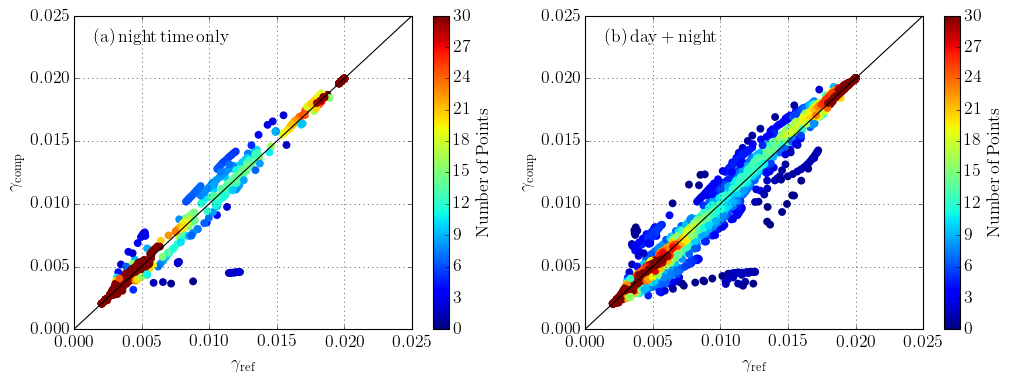

In [4]:
# Only nighttime cases

from scipy.stats import gaussian_kde
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(13,5))
###################
plt.subplot(1,2,1)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df2["gamma_pop_ref"]
y = df2["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (a)\,night \,time \,only$')
plt.grid()
###################
plt.subplot(1,2,2)
plt.xlim(0,2.5e-2);plt.ylim(0,2.5e-2)
plt.plot([0,3e-2],[0,3e-2],'-', color='k',lw=1)
x = df3["gamma_pop_ref"]
y = df3["gamma_pop_comp"]
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
a = plt.scatter(x, y, c = z*1e-3, s = 50, edgecolors = 'none', vmin=0, vmax=30)
cbar = plt.colorbar()
cbar.set_label(r'$\rm Number\,of\,Points$')
plt.xlabel(r'$\gamma_{\rm ref}$')
plt.ylabel(r'$\gamma_{\rm comp}$')
plt.text(0.0015, 0.023, r'$\rm (b)\,day + night$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('gamma_pop_comparison.pdf')

# bulk masses

In [43]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [44]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776829'
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            if (ncf.variables['bulk_no3_masses'].shape[0] != 49):
                print(sce)
                pass
            else:
                for i in range(10):
                    bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                    bulk_masses[11, sce, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
so4 = sum(bulk_masses[1,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
oc = sum(bulk_masses[2,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
soa = sum(bulk_masses[3,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
nh4 = sum(bulk_masses[4,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
na = sum(bulk_masses[5,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
cl = sum(bulk_masses[6,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
bc = sum(bulk_masses[7,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
oin = sum(bulk_masses[8,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
ca = sum(bulk_masses[9,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())
co3 = sum(bulk_masses[10,:,:].ravel())/sum(bulk_masses[11,:,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

75
91
(4900, 10)
(1200, 10)
no3: 0.38423531343378525
so4: 0.10681495545409482
oc: 0.12737119290180385
soa: 0.09441047276861281
nh4: 0.14986468226998642
na: 0.0
cl: 0.014885531087665263
bc: 0.12241785208405132
oin: 0.0
ca: 0.0
co3: 0.0
0.9999999999999997


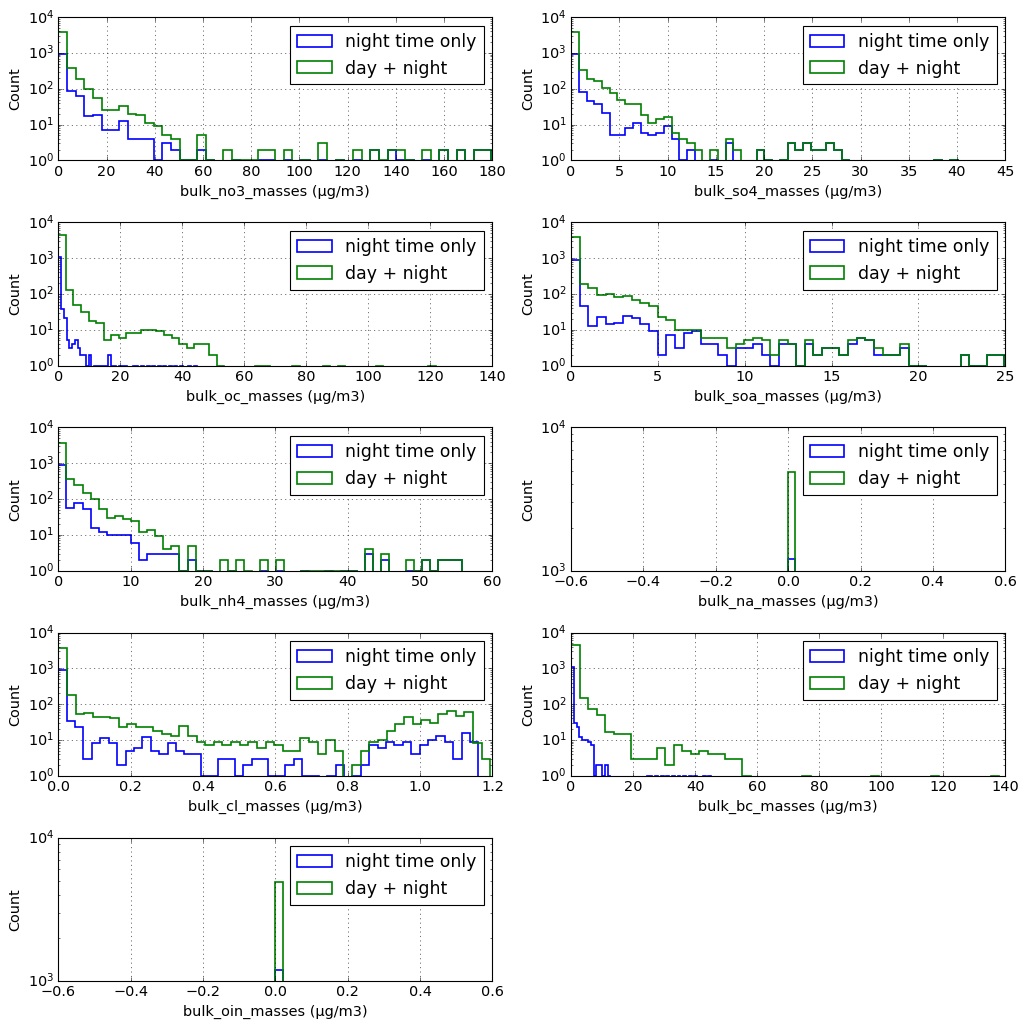

In [45]:
from matplotlib import style
plt.style.use('classic')
mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_wdm_2ndngt, x = 'bulk_'+ s[i] + '_masses', bins = 50, histtype = 'step', lw = 1.5, label = 'night time only')
    plt.hist(data = df_wdm, x = 'bulk_'+ s[i] + '_masses', bins = 50, histtype = 'step', lw = 1.5, label = 'day + night')
    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    plt.yscale('log')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.grid()
    plt.legend()
    plt.tight_layout(pad = 1.0)

# composition distribution

In [7]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [10]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776829/scenarios/scenario_0010'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

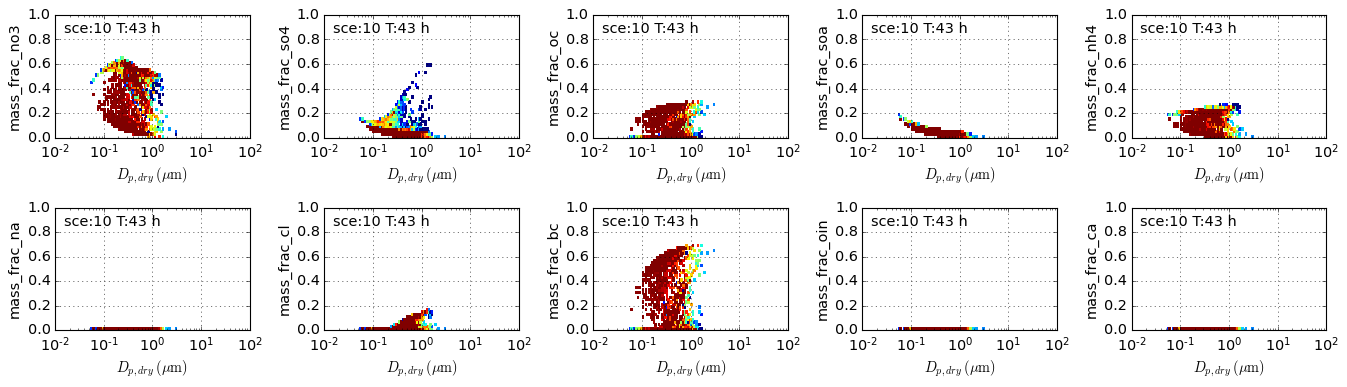

In [30]:
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(17,5))

X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(2,5,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,43,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.xlabel(r'$D_{p,dry} \,(\rm \mu m)$')
    plt.ylabel("mass_frac_" + s[i])
    plt.yscale('linear')
    plt.text(0.015, 0.85, 'sce:%d T:%d h '% (10, 43))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

In [35]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
dtype: object
bulk_no3_masses


In [37]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0024'
bulk_masses = np.zeros((12,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename)
            for i in range(10):
                bulk_masses[i, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                bulk_masses[11, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:].ravel() + bulk_masses[3,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:].ravel())/sum(bulk_masses[11,:].ravel())
so4 = sum(bulk_masses[1,:].ravel())/sum(bulk_masses[11,:].ravel())
oc = sum(bulk_masses[2,:].ravel())/sum(bulk_masses[11,:].ravel())
soa = sum(bulk_masses[3,:].ravel())/sum(bulk_masses[11,:].ravel())
nh4 = sum(bulk_masses[4,:].ravel())/sum(bulk_masses[11,:].ravel())
na = sum(bulk_masses[5,:].ravel())/sum(bulk_masses[11,:].ravel())
cl = sum(bulk_masses[6,:].ravel())/sum(bulk_masses[11,:].ravel())
bc = sum(bulk_masses[7,:].ravel())/sum(bulk_masses[11,:].ravel())
oin = sum(bulk_masses[8,:].ravel())/sum(bulk_masses[11,:].ravel())
ca = sum(bulk_masses[9,:].ravel())/sum(bulk_masses[11,:].ravel())
co3 = sum(bulk_masses[10,:].ravel())/sum(bulk_masses[11,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

(49, 10)
(12, 10)
no3: 0.07003246222372235
so4: 0.6404554059831703
oc: 1.5471238904028843e-06
soa: 0.07769982042473945
nh4: 0.21109983606646898
na: 0.0
cl: 0.0007104077836702975
bc: 5.20394338118945e-07
oin: 0.0
ca: 0.0
co3: 0.0
0.9999999999999999


In [38]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0037'
nmass_frac_dist = np.zeros((10,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            # print(filename)
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(10):
                nmass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

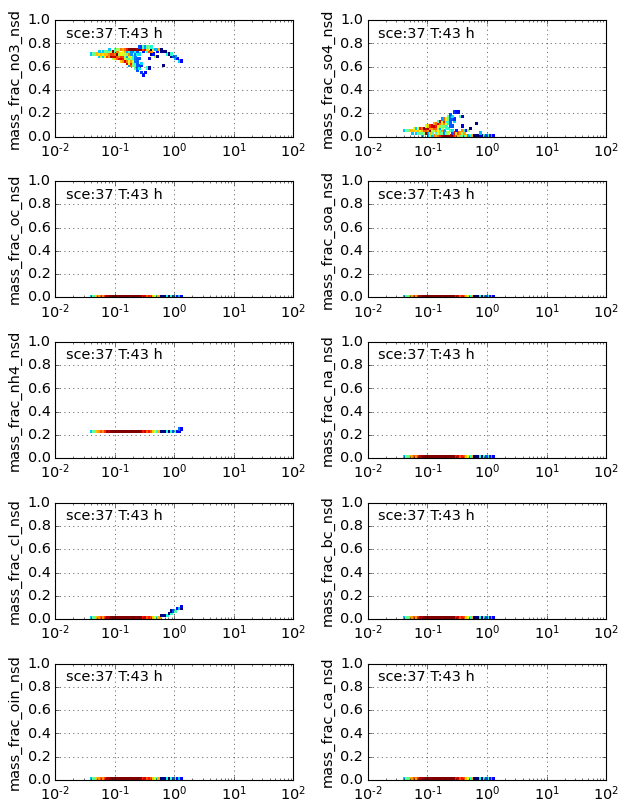

In [39]:
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.usetex'] = False
plt.figure(figsize=(8,20))

X, Y = np.meshgrid(diam_edges, bc_edges)

for i in range(10):
    plt.subplot(10,2,i+1)
    p = plt.pcolormesh (X, Y, nmass_frac_dist[i,43,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e2)
    plt.xscale('log')
    # plt.ylim(0,1)
    plt.ylabel('mass_frac_' + s[i] + '_nsd')
    plt.yscale('linear')
    plt.text(0.015, 0.85, 'sce:%d T:%d h'% (37, 43))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

In [ ]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3'])
print(s)
print('bulk_'+ s[0] + '_masses')

In [42]:
# Exclude seasalt & dust
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust_so4/0_hydr_noo/scenarios/scenario_0007'
bulk_masses = np.zeros((12,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            ncf = scipy.io.netcdf_file(filename)
            for i in range(10):
                bulk_masses[i, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg
                bulk_masses[11, :] = ncf.variables['tot_drymass_conc'].data * 1e9

d_wdm = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:].ravel(),
          'bulk_'+ s[1] + '_masses': bulk_masses[1,:].ravel(),
          'bulk_'+ s[2] + '_masses': bulk_masses[2,:].ravel(),
          'bulk_'+ s[3] + '_masses': bulk_masses[3,:].ravel(),
          'bulk_'+ s[4] + '_masses': bulk_masses[4,:].ravel(),
          'bulk_'+ s[5] + '_masses': bulk_masses[5,:].ravel(),
          'bulk_'+ s[6] + '_masses': bulk_masses[6,:].ravel(),
          'bulk_'+ s[7] + '_masses': bulk_masses[7,:].ravel(),
          'bulk_'+ s[8] + '_masses': bulk_masses[8,:].ravel(),
          'bulk_org_masses': bulk_masses[2,:].ravel() + bulk_masses[3,:].ravel()}
df_wdm = pd.DataFrame(data=d_wdm)
print(df_wdm.shape)
df_wdm_2ndngt = df_wdm[((df_wdm.index.values % 49) >= 37) & ((df_wdm.index.values % 49) <= 48)]  # ngt: night
print(df_wdm_2ndngt.shape)

no3 = sum(bulk_masses[0,:].ravel())/sum(bulk_masses[11,:].ravel())
so4 = sum(bulk_masses[1,:].ravel())/sum(bulk_masses[11,:].ravel())
oc = sum(bulk_masses[2,:].ravel())/sum(bulk_masses[11,:].ravel())
soa = sum(bulk_masses[3,:].ravel())/sum(bulk_masses[11,:].ravel())
nh4 = sum(bulk_masses[4,:].ravel())/sum(bulk_masses[11,:].ravel())
na = sum(bulk_masses[5,:].ravel())/sum(bulk_masses[11,:].ravel())
cl = sum(bulk_masses[6,:].ravel())/sum(bulk_masses[11,:].ravel())
bc = sum(bulk_masses[7,:].ravel())/sum(bulk_masses[11,:].ravel())
oin = sum(bulk_masses[8,:].ravel())/sum(bulk_masses[11,:].ravel())
ca = sum(bulk_masses[9,:].ravel())/sum(bulk_masses[11,:].ravel())
co3 = sum(bulk_masses[10,:].ravel())/sum(bulk_masses[11,:].ravel())

print('no3:', no3)
print('so4:', so4)
print('oc:', oc)
print('soa:', soa)
print('nh4:', nh4)
print('na:', na)
print('cl:', cl)
print('bc:', bc)
print('oin:', oin)
print('ca:', ca)
print('co3:', co3)
print(no3+so4+oc+soa+nh4+na+cl+bc+oin+ca+co3)

(49, 10)
(12, 10)
no3: 0.17292371358034261
so4: 0.029425029519263464
oc: 0.05217708958320484
soa: 0.03791555827590263
nh4: 0.06171485056210576
na: 0.0
cl: 0.004879486951821759
bc: 0.14827273593813545
oin: 0.49269153558922374
ca: 0.0
co3: 0.0
1.0000000000000004


# size distribution

In [31]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776829'
h1_wds = np.zeros((100,49,180)) # gamma * surf_dist
h2_wds = np.zeros((100,49,180)) # surf_area_dist
hgamma_wds = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            h1_wds[sce_index, t_index,:] = ncf.variables["gamma_surf_pr"].data*1e6 # m-3 to cm-3
            h2_wds[sce_index, t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6 # m-3 to cm-3
            hgamma_wds[sce_index, t_index,:] = h1_wds[sce_index, t_index,:]/h2_wds[sce_index, t_index,:]

In [32]:
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/776829'
surf_area_dist = np.zeros((100,49,180)) # for PR
mass_dist = np.zeros((100,49,180)) # for CA
num_dist = np.zeros((100,49,180))
no3_dist = np.zeros((100,49,180))
so4_dist = np.zeros((100,49,180))
wi_dist = np.zeros((100,49,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ('out/urban_plume_00000' in filename and '.nc' in filename):
            t_index = int(filename[-13:-11]) - 1
            sce_index = int(filename[-38:-36])
            ncf = scipy.io.netcdf_file(filename)
            diam = ncf.variables["diam"].data* 1e6 # m to µm
            surf_area_dist[sce_index,t_index,:] = ncf.variables["surf_area_dist_pr"].data*1e6
            mass_dist[sce_index,t_index,:] = ncf.variables["mass_dist_pr"].data*1e9 # kg to µg
            num_dist[sce_index,t_index,:] = ncf.variables["num_dist"].data*1e6 # m-3 to cm-3
            no3_dist[sce_index,t_index,:] = ncf.variables["mass_no3_dist"].data*1e9
            so4_dist[sce_index,t_index,:] = ncf.variables["mass_so4_dist"].data*1e9
            wi_dist[sce_index,t_index,:] = so4_dist[sce_index,t_index,:]/(so4_dist[sce_index,t_index,:]+no3_dist[sce_index,t_index,:])

In [5]:
print(df_wdsallbelow.sort_values(by='gamma_pop_error', ascending=True))
case_index = df_wdsallbelow.sort_values(by='gamma_pop_error', ascending=True).index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)
print(df_wdsallbelow.shape)



      gamma_pop_ref  gamma_pop_comp  gamma_pop_error
1199       0.012444        0.003636       -70.783995
1200       0.011684        0.003470       -70.302183
1201       0.011601        0.003547       -69.427204
1198       0.011851        0.003777       -68.134200
1202       0.011318        0.003639       -67.850585
...             ...             ...              ...
3354       0.016194        0.012920       -20.217334
1098       0.003601        0.002873       -20.195931
2265       0.005703        0.004552       -20.181336
3355       0.015958        0.012742       -20.153823
3353       0.016403        0.013116       -20.038179

[226 rows x 3 columns]
[24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 57
 10 57 10 24 24 10 68 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57 57
 57 57 57 57 57 57 57 57 57 68 22 68 10 57 17 17 57 68 22 17 17 87 87 53
 17 87 87 17 17 10 87 17 17 87 17 17 17 87 87 53